In [2]:
import numpy as np
import matplotlib.pyplot as plt

print(max(3,2))

3


In [6]:
a = np.array([1, 2, -3, 4, -5, 6])
mask = a < 0
a[mask] = 999

print(a)  # 输出: [1 2 0 4 0 6]

[  1   2 999   4 999   6]


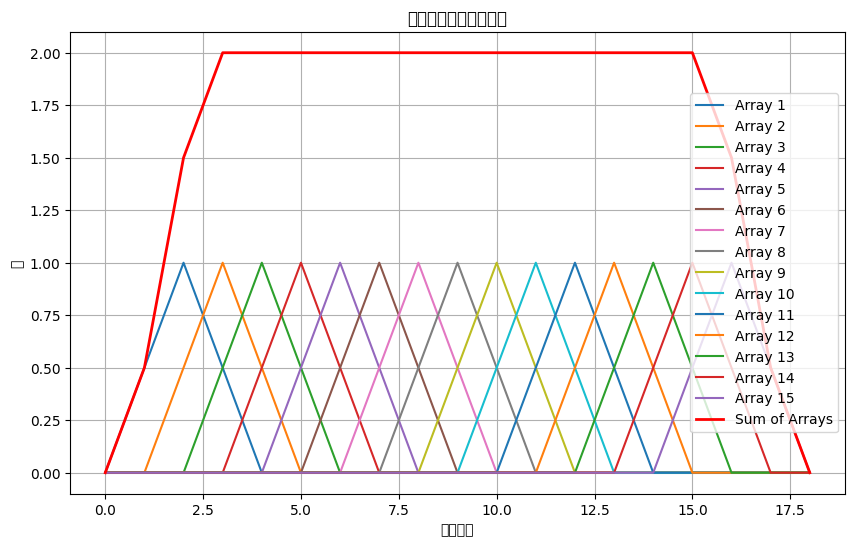

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# 定义数组的长度
length = 6

# 创建一个基础数组，从0增大至1，再从1降低至0
base_array = np.zeros(length)
each_point = length // 2
base_array_front = np.linspace(0, 1, each_point)
base_array_end = np.linspace(1, 0, each_point)
base_array = np.concatenate([base_array_front, base_array_end[1:]])
# 定义要生成的数组数量
num_arrays = 15

# 创建一个数组的列表
arrays = []
#sum_array = np.zeros(length + num_arrays - 1)

# 对基础数组进行平移，生成其余数组
for i in range(num_arrays):
    shifted_array = np.concatenate([np.zeros(i), base_array, np.zeros(num_arrays - i - 1)])
    arrays.append(shifted_array)

# 将所有数组进行求和
sum_array = np.sum(arrays, axis=0)

# 绘制所有数组和它们的和
plt.figure(figsize=(10, 6))
for i, array in enumerate(arrays):
    plt.plot(array, label=f'Array {i+1}')

plt.plot(sum_array, label='Sum of Arrays', color='red', linewidth=2)
plt.legend()
plt.title('数组及其和的图形表示')
plt.xlabel('数组索引')
plt.ylabel('值')
plt.grid(True)
plt.show()
